# Provando la uniformidad y aleatoriedad de algunos generadores 

se confrontan valores para evaluar distintos generadores congruenciales mediates las siguientes pruebas 

##El código, 

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import math

def generar_num_pseudoaleatorios(n, x0, a, b, m):
    """Retorna una secuencia de n números pseudoaleatorios.
    
    A partir de cualquiera de los generadores midsquare, congruencial multiplicativo o mixto.
    x0 es el valor para la semilla, a, b y m los parámetros para los congruenciales.
    """
    secuencia = []
    if n==0:
        print 'generar_num_pseudoaleatorio_Error: Ingrese una cantidad n válida.'
    
    elif a==0 and b==0 and m!=0:
        print 'generar_num_pseudoaleatorio_Error: Ingrese un multiplicador a válido.'
        
    elif a==0 and b!=0 and m!=0:
        print 'generar_num_pseudoaleatorio_Error: Ingrese un multiplicador a válido.'

    elif a!=0 and b==0 and m==0:
        print 'generar_num_pseudoaleatorio_Error: Ingrese un módulo m válido.'

    elif a!=0 and b!=0 and m==0:
        print 'generar_num_pseudoaleatorio_Error: Ingrese un módulo m válido.'

    elif a==0 and b!=0 and m==0:
        print 'generar_num_pseudoaleatorio_Error: Ingrese un multiplicador a válido.'
        print 'generar_num_pseudoaleatorio_Error: Ingrese un módulo m válido.'   

    elif a==0 and b==0 and m==0: #Generador MidSquare.
        longitud_x0 = len(str(x0))
        
        if longitud_x0 %2 == 0:
            for i in range(0,n):
                numCuadrado = str(x0**2)
                if len(numCuadrado) < 2*longitud_x0:
                    cantidadDeCerosPorAgregar = 2*longitud_x0 - len(numCuadrado)
                    cadenaDeCeros = "" 
                    for ii in range(0,cantidadDeCerosPorAgregar):
                        cadenaDeCeros = '0' + cadenaDeCeros
                        numCuadrado = cadenaDeCeros + numCuadrado
                #print "Numero cuadrado" + str(i) + " = " + numCuadrado
                xi = numCuadrado[ int (0.5*longitud_x0) : int (0.5*longitud_x0 + longitud_x0) ]
                #print "X" + str(i) + " = " + xi
                ui = '0.'+ xi
                secuencia.append(ui)
                #print "U" + str(i) + " = " + ui
                x0 = int(xi)
            return secuencia

        else: 
            print 'MidSquareError: Debe ingresar un valor de semilla con un numero de cifras PAR. \n'
    
    else: #Generador Congruencial.
       for i in range(0,n):
            xi = (a*x0 + b) % m
            ui = xi/float(m)
            secuencia.append(ui)
            x0 = xi
       return secuencia


        
def test_de_kolmogorov_smirnov(secuencia=[]):
    """Imprime el resultado de aplicar el Test K-S sobre una secuencia de valores U[0,1]."""    
    N = len(secuencia)
    # Teoretical CDF for Uniform distribution F(x)
    u = [1.0] * N
    #print(u)
    
    # Plot empirical distribution f(x)
    count, bins, ignored = plt.hist(secuencia, 25, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()
    
    x1 = np.arange(1/float(N), 1+1/float(N) , 1/float(N))
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))
    
    x2 = np.sort(secuencia)
    y2 = np.cumsum(np.sort(secuencia)/np.max(np.cumsum(secuencia)))
    
    De=np.absolute(y2-y1)
    print("De = ",np.max(De))
    
    # Plotting
    plt.plot(x1,y1,label='Uniform')
    plt.step(x2,y2,label='Random')
    x3 = [x1[De.argmax()],x1[De.argmax()]]
    y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
    plt.step(x3,y3,label='D')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')
    plt.ylim(0, 1.05)
    plt.show()
    
    # scipy function for K-S test
    from scipy import stats
    D,pvalue = stats.kstest(y2, 'uniform')
    print("D = ", D)
    print("p-value = ", pvalue)
    

    
def test_chi_cuadrado(k, secuencia=[]):
    """Retorna el valor aproximado Ji-cuadrado para una secuencia de valores de una distribución U(0,1).
    
    k es la cantidad de particiones para el intervalo [0,1].
    """
    longitudIntervalo = 1/float(k)  
    frecuenciasObservadas = []           #Creando la lista que guardará los contadores para c/u de los k intervalos.
    
    #Llenando con ceros los contadores de la lista.
    for i in range(0,k):
        frecuenciasObservadas.append(0)
    
    #print 'Longitud lista de FO = ' + str(len(frecuenciasObservadas))
   
    #Recorriendo los valores de la secuencia y aumentando los contadores para c/u de los k intervalos.    
    for i in range(len(secuencia)):
        cont = 1
        for j in range(0,k):     
            if secuencia[i]>(cont-1)*longitudIntervalo and secuencia[i]<=cont*longitudIntervalo:
                frecuenciasObservadas[j]+=1
            cont+=1 
            
    #     Imprimiendo las frecuencias observados en cada intervalo.   
    #    for i in range(len(frecuenciasObservadas)):
    #        print 'F[' + str(i) + ']' + ' = ' + str(frecuenciasObservadas[i])+ '\n'
        
    frecuenciaEsperada = len(secuencia)/float(k)
    estimadoJiCuadrado = 0.0
        
    for i in range(0,k):
        estimadoJiCuadrado += (frecuenciasObservadas[i]-frecuenciaEsperada)**2 / frecuenciaEsperada
    return estimadoJiCuadrado



def test_rachas(secuencia=[]):
    """Retorna el valor estadístico de contraste Z para determinar la aleatoriedad de una secuencia."""
    rachas = []           #Creando la lista para las rachas de la secuencia.
    rachas.append(' ')    #Añadiendo un espacio para el primer valor de la lista.
    #Completando con ceros los demás valores de la lista.    
    for i in range(1, len(secuencia)):
        rachas.append(0)
        
    #Recorriendo la secuencia y llenando con 1 ó 0.   
    for i in range(0, len(secuencia)-1):
        if secuencia[i+1]>secuencia[i]:
            rachas[i+1]=1
    print '\nRachas = ' + str(rachas)
    
    #Determinando el número de rachas de la secuencia.
    numRachas = 0
    print (rachas[0])
    for i in range(1, len(rachas)-1):
        if rachas[i+1] != rachas[i]:
            numRachas += 1
    numRachas += 1
    print 'Numero de rachas de la secuencia = ' + str(numRachas) + '\n'
        
    #Calculando el estadístico de contraste Z.  
    n = len(secuencia)
    z = (numRachas - ((2*n - 1)/float(3))) / (math.sqrt((16*n-29)/float(90)))
    return 'Z = ' + str(z)


# Aplicando los contrastes de uniformidad y aleatoriedad a los generadores... 
###a)RANDU.     xi+1 = 65539xi mod 2^31 

In [3]:
s = generar_num_pseudoaleatorios(100,7,65539,0,math.pow(2,31))

In [4]:
s

[0.00021363282576203346,
 0.0012817676179111004,
 0.005767910275608301,
 0.023071553092449903,
 0.08651812607422471,
 0.31146477861329913,
 0.0901255370117724,
 0.7375702145509422,
 0.6142914541997015,
 0.04761679423972964,
 0.7570776776410639,
 0.11391491768881679,
 0.8697904073633254,
 0.19350818498060107,
 0.3329354436136782,
 0.25603899685665965,
 0.539814988616854,
 0.9345389599911869,
 0.7488988623954356,
 0.08254253445193172,
 0.7551654451526701,
 0.7881098608486354,
 0.9321701587177813,
 0.5000322046689689,
 0.6106617995537817,
 0.16368095530197024,
 0.48612953582778573,
 0.4436486172489822,
 0.2867258810438216,
 0.7275177310220897,
 0.7845734567381442,
 0.15978116123005748,
 0.8975258567370474,
 0.9471246893517673,
 0.6050154254771769,
 0.10597034869715571,
 0.19068326288834214,
 0.19036643905565143,
 0.4260492683388293,
 0.8429976585321128,
 0.2235425361432135,
 0.7542762900702655,
 0.5137749151326716,
 0.2941628801636398,
 0.14100304478779435,
 0.19855234725400805,
 0.922286

#### Realizando pruebas de UNIFORMIDAD...

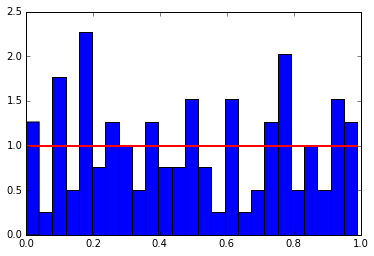

('De = ', 0.26724660473662543)


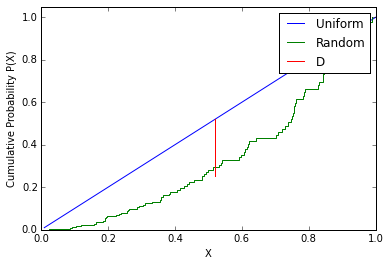

('D = ', 0.2672466047366252)
('p-value = ', 8.5199915034195328e-07)


In [5]:
test_de_kolmogorov_smirnov(s)

Realizando el test chi cuadrado para 10 grados de libertad (k=11) y alpha=0.05 ...

In [6]:
test_chi_cuadrado(11,s)

6.919999999999998

Como el estimado = 6.92 es menor que el valor proporcionado por la tabla T = 18.307, SE ACEPTA LA UNIFORMIDAD DE LA SECUENCIA DE VALORES.

#### Realizando pruebas de ALEATORIEDAD... 

In [7]:
test_rachas(s)


Rachas = [' ', 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
 
Numero de rachas de la secuencia = 61



'Z = -1.27653254084'

###b) NUMERICAL RECIEPES.    xi+1 = 1664525xi + 1013904223 mod 2^32 

In [8]:
s = generar_num_pseudoaleatorios(100,7,1664525,1013904223,math.pow(2,32))

In [9]:
s

[0.23878083983436227,
 0.9134932646993548,
 0.6124916663393378,
 0.9269814591389149,
 0.049341175239533186,
 0.8557835568208247,
 0.3609851561486721,
 0.05310634127818048,
 0.06878403620794415,
 0.9839370010886341,
 0.9728050315752625,
 0.5312507867347449,
 0.45185762410983443,
 0.5478393950033933,
 0.6050359960645437,
 0.7774173074867576,
 0.7798123680986464,
 0.4180773722473532,
 0.47410799842327833,
 0.8521434802096337,
 0.36246391339227557,
 0.48150725034065545,
 0.09194125235080719,
 0.7491372001823038,
 0.8342014220543206,
 0.35811294079758227,
 0.17884906847029924,
 0.9817634976934642,
 0.12206618627533317,
 0.4547779217828065,
 0.45632349886000156,
 0.10800791694782674,
 0.11402555415406823,
 0.6215962732676417,
 0.7728287940844893,
 0.08454145747236907,
 0.6055671679787338,
 0.9263477746862918,
 0.2657276727259159,
 0.5905120780225843,
 0.35273851500824094,
 0.3127620650921017,
 0.5124654034152627,
 0.7116877629887313,
 0.30975679075345397,
 0.15819686581380665,
 0.87413669936

#### Realizando pruebas de UNIFORMIDAD...

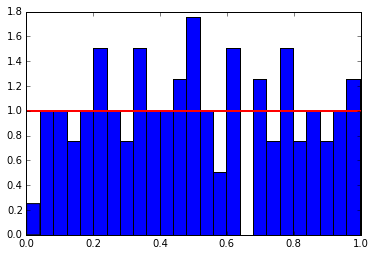

('De = ', 0.23478823205518001)


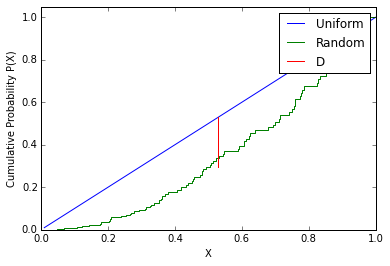

('D = ', 0.23478823205517979)
('p-value = ', 2.4793840659009803e-05)


In [10]:
test_de_kolmogorov_smirnov(s)

Realizando el test chi cuadrado para 10 grados de libertad (k=11) y alpha=0.05 ...

In [11]:
test_chi_cuadrado(11,s)

5.159999999999999

Como el estimado = 5.16 es menor que el valor proporcionado por la tabla T = 18.307, SE ACEPTA LA UNIFORMIDAD DE LA SECUENCIA DE VALORES.

#### Realizando pruebas de ALEATORIEDAD... 

In [12]:
test_rachas(s)


Rachas = [' ', 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
 
Numero de rachas de la secuencia = 60



'Z = -1.51588239224'

###c) Borland C/C++.  xi+1 = 22695477xi + 1  mod 2^32

In [13]:
s = generar_num_pseudoaleatorios(100,7,22695477,1,math.pow(2,32))

In [14]:
s

[0.0369894178584218,
 0.4822492015082389,
 0.6610986012965441,
 0.10045788623392582,
 0.6464906800538301,
 0.3598760608583689,
 0.8620617110282183,
 0.7352215722203255,
 0.2822302356362343,
 0.8215867355465889,
 0.860102690756321,
 0.8356981948018074,
 0.15906593948602676,
 0.37108851224184036,
 0.7945489063858986,
 0.43025631457567215,
 0.2915569320321083,
 0.6451252773404121,
 0.8939979448914528,
 0.7963312342762947,
 0.2118992581963539,
 0.7407124117016792,
 0.5033899918198586,
 0.9813777878880501,
 0.01332411915063858,
 0.23972857766784728,
 0.4207033412531018,
 0.005232922732830048,
 0.6775257217232138,
 0.4342775996774435,
 0.27509462647140026,
 0.767905255779624,
 0.07072557508945465,
 0.6627544912043959,
 0.31177606992423534,
 0.6241158749908209,
 0.48618905059993267,
 0.41554260812699795,
 0.7052662950009108,
 0.9770683851093054,
 0.061675384640693665,
 0.2735790165606886,
 0.2780357273295522,
 0.45478612277656794,
 0.989394772797823,
 0.3099532164633274,
 0.0953194685280323,


#### Realizando pruebas de UNIFORMIDAD...

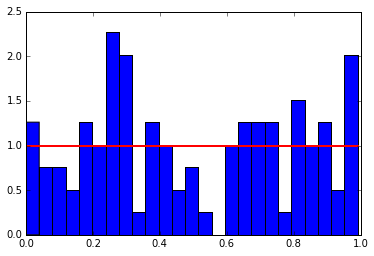

('De = ', 0.26953148545724587)


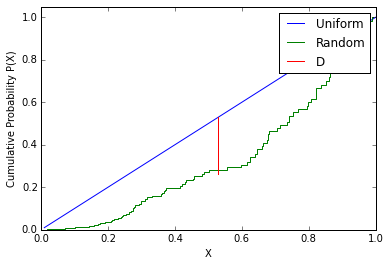

('D = ', 0.26953148545724565)
('p-value = ', 6.6044909874385382e-07)


In [15]:
test_de_kolmogorov_smirnov(s)

Realizando el test chi cuadrado para 10 grados de libertad (k=11) y alpha=0.05 ...

In [16]:
test_chi_cuadrado(11,s)

9.559999999999999

Como el estimado = 9.56 es menor que el valor proporcionado por la tabla T = 18.307, SE ACEPTA LA UNIFORMIDAD DE LA SECUENCIA DE VALORES.

#### Realizando pruebas de ALEATORIEDAD... 

In [17]:
test_rachas(s)


Rachas = [' ', 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1]
 
Numero de rachas de la secuencia = 67



'Z = 0.159566567605'

###d) SINCLAIR ZX81. xi+1 = 75xi  mod  (2^16+1) 

In [18]:
s = generar_num_pseudoaleatorios(100,7,75,0,(math.pow(2,16)+1))

In [19]:
s

[0.008010742023589729,
 0.6008056517692296,
 0.06042388269221966,
 0.5317912019164747,
 0.8843401437355998,
 0.3255107801699803,
 0.41330851274852376,
 0.9981384561392801,
 0.8603842104460075,
 0.5288157834505699,
 0.661183758792743,
 0.5887819094557273,
 0.15864320917954744,
 0.8982406884660573,
 0.3680516349543006,
 0.6038726215725468,
 0.2904466179410104,
 0.7834963455757816,
 0.7622259181836215,
 0.16694386377160994,
 0.5207897828707447,
 0.05923371530585776,
 0.442528647939332,
 0.18964859544989854,
 0.22364465874238978,
 0.7733494056792346,
 0.0012054259425973114,
 0.09040694569479836,
 0.7805209271098769,
 0.5390695332407648,
 0.4302149930573569,
 0.26612447930176847,
 0.959335947632635,
 0.950196072447625,
 0.2647054335718754,
 0.8529075178906572,
 0.968063841799289,
 0.6047881349466714,
 0.35911012100035095,
 0.933259075026321,
 0.9944306269740757,
 0.5822970230556784,
 0.6722767291758853,
 0.4207546881914033,
 0.5566016143552497,
 0.745121076643728,
 0.8840807482795978,
 0.30

#### Realizando pruebas de UNIFORMIDAD...

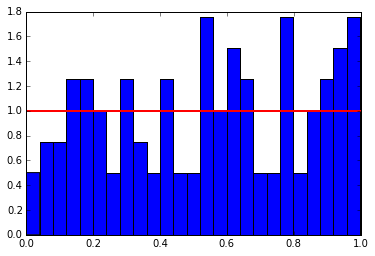

('De = ', 0.23274222200538172)


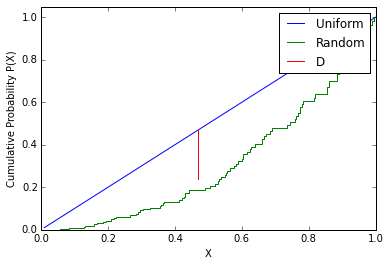

('D = ', 0.23274222200538144)
('p-value = ', 3.0197228824802025e-05)


In [20]:
test_de_kolmogorov_smirnov(s)

Realizando el test chi cuadrado para 10 grados de libertad (k=11) y alpha=0.05 ...

In [21]:
test_chi_cuadrado(11,s)

5.819999999999999

Como el estimado = 5.82 es menor que el valor proporcionado por la tabla T = 18.307, SE ACEPTA LA UNIFORMIDAD DE LA SECUENCIA DE VALORES.

#### Realizando pruebas de ALEATORIEDAD... 

In [22]:
test_rachas(s)


Rachas = [' ', 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
 
Numero de rachas de la secuencia = 71



'Z = 1.11696597323'